# Remote Work vs Travel Data

In [71]:
# Imports:
import pprint, json, csv, os.path as path
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import scipy.stats as st
import requests 
import hvplot.pandas

In [24]:
crime_data_2020 = pd.read_csv("Resources/crime_data_2020.csv")
crime_data_2021 = pd.read_csv("Resources/crime_data_2021.csv")
crime_data_2022 = pd.read_csv("Resources/crime_data_2022.csv")

for dat_fr in [crime_data_2020, crime_data_2021, crime_data_2022]:
    dat_fr["DATE OCC"] = pd.to_datetime(dat_fr["DATE OCC"])
    dat_fr["Date Rptd"] = pd.to_datetime(dat_fr["Date Rptd"])
    dat_fr['Year Crime Occured'] = dat_fr['DATE OCC'].dt.year

crime_data_2020.head()

,Unnamed: 0,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Year Crime Occured
0,0,10304468,2020-01-08,2020-01-08,2230,3,Southwest,377,2,624,...,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,2020
1,1,190101086,2020-01-02,2020-01-01,330,1,Central,163,2,624,...,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,2020
2,2,200110444,2020-04-14,2020-02-13,1200,1,Central,155,2,845,...,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474,2020
3,3,191501505,2020-01-01,2020-01-01,1730,15,N Hollywood,1543,2,745,...,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,2020
4,4,191921269,2020-01-01,2020-01-01,415,19,Mission,1998,2,740,...,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,2020


In [25]:
crime_data_all = pd.concat([crime_data_2020, crime_data_2021, crime_data_2022])


In [26]:
crime_data_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 641439 entries, 0 to 233743
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Unnamed: 0          641439 non-null  int64         
 1   DR_NO               641439 non-null  int64         
 2   Date Rptd           641439 non-null  datetime64[ns]
 3   DATE OCC            641439 non-null  datetime64[ns]
 4   TIME OCC            641439 non-null  int64         
 5   AREA                641439 non-null  int64         
 6   AREA NAME           641439 non-null  object        
 7   Rpt Dist No         641439 non-null  int64         
 8   Part 1-2            641439 non-null  int64         
 9   Crm Cd              641439 non-null  int64         
 10  Crm Cd Desc         641439 non-null  object        
 11  Mocodes             553486 non-null  object        
 12  Vict Age            641439 non-null  int64         
 13  Vict Sex            557874 non-nul

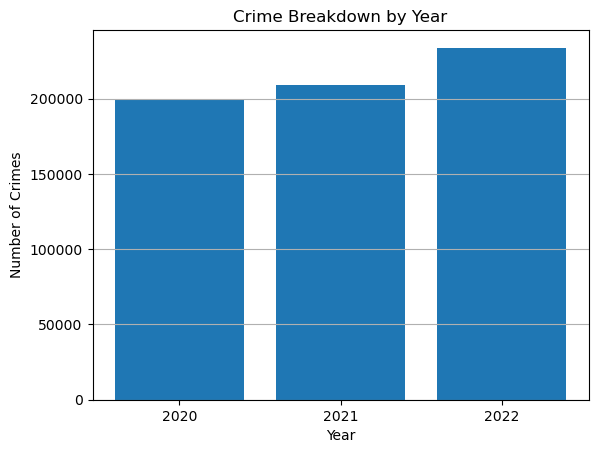

In [27]:
x = crime_data_all.groupby('Year Crime Occured',as_index=False).count()
y = x[['Year Crime Occured', 'DR_NO']].sort_values(by='Year Crime Occured')

plt.bar(x['Year Crime Occured'], y['DR_NO'])
plt.title("Crime Breakdown by Year")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.xticks([2020, 2021, 2022])
plt.grid(axis='y')
plt.show()

In [28]:
crime_data_2020['Month Crime Occured'] = crime_data_2020['DATE OCC'].dt.month
crime2020 = crime_data_2020[crime_data_2020['Month Crime Occured'].between(1,12)]
crime2020

,Unnamed: 0,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,...,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Year Crime Occured,Month Crime Occured
0,0,10304468,2020-01-08,2020-01-08,2230,3,Southwest,377,2,624,...,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,2020,1
1,1,190101086,2020-01-02,2020-01-01,330,1,Central,163,2,624,...,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,2020,1
2,2,200110444,2020-04-14,2020-02-13,1200,1,Central,155,2,845,...,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474,2020,2
3,3,191501505,2020-01-01,2020-01-01,1730,15,N Hollywood,1543,2,745,...,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,2020,1
4,4,191921269,2020-01-01,2020-01-01,415,19,Mission,1998,2,740,...,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198860,199444,230319020,2023-10-15,2020-06-04,1300,3,Southwest,317,1,440,...,440.0,NaN,NaN,NaN,1400 W ADAMS BL,NaN,34.0349,-118.2959,2020,6
198861,199445,200114097,2020-06-29,2020-06-29,700,1,Central,128,2,740,...,740.0,NaN,NaN,NaN,300 E 1ST ST,NaN,34.0504,-118.2409,2020,6
198862,199446,201816432,2020-08-30,2020-08-30,2330,18,Southeast,1861,1,815,...,815.0,NaN,NaN,NaN,11400 MENLO AV,NaN,33.9310,-118.2893,2020,8
198863,199447,200121738,2020-11-30,2020-11-30,815,1,Central,119,2,930,...,930.0,NaN,NaN,NaN,RAMIREZ,VIGNES,34.0551,-118.2322,2020,11


In [29]:
crime_data_2021['Month Crime Occured'] = crime_data_2021['DATE OCC'].dt.month
crime2021 = crime_data_2021[crime_data_2021['Month Crime Occured'].between(1,12)]
crime2021

,Unnamed: 0,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,...,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Year Crime Occured,Month Crime Occured
0,129229,212005799,2021-02-21,2021-02-20,1900,20,Olympic,2004,1,510,...,510.0,NaN,NaN,NaN,500 N WESTERN AV,NaN,34.0802,-118.3091,2021,2
1,129506,211413827,2021-06-23,2021-06-23,238,14,Pacific,1467,1,510,...,510.0,NaN,NaN,NaN,5700 W 74TH ST,NaN,33.9714,-118.3803,2021,6
2,129868,211310282,2021-05-27,2021-05-26,1500,13,Newton,1394,1,510,...,510.0,NaN,NaN,NaN,6700 S MAIN ST,NaN,33.9784,-118.2739,2021,5
3,130006,210104477,2021-01-12,2021-01-11,1730,1,Central,159,1,510,...,510.0,NaN,NaN,NaN,1800 INDUSTRIAL ST,NaN,34.0357,-118.2324,2021,1
4,130254,212013279,2021-08-21,2021-08-20,30,20,Olympic,2027,1,510,...,510.0,NaN,NaN,NaN,3400 W 5TH ST,NaN,34.0654,-118.2941,2021,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208825,408835,211421071,2021-11-07,2021-11-07,100,14,Pacific,1431,1,761,...,761.0,NaN,NaN,NaN,00 WINDWARD AV,NaN,33.9873,-118.4729,2021,11
208826,408836,210516671,2021-12-01,2021-12-01,1430,5,Harbor,585,2,740,...,740.0,NaN,NaN,NaN,1900 S GRAND AV,NaN,33.7270,-118.2902,2021,12
208827,408837,210217231,2021-11-06,2021-11-05,2300,2,Rampart,235,1,510,...,510.0,NaN,NaN,NaN,2300 MIRAMAR ST,NaN,34.0649,-118.2741,2021,11
208828,408838,210312887,2021-07-12,2021-07-12,1200,3,Southwest,363,1,350,...,350.0,NaN,NaN,NaN,CRENSHAW BL,STOCKER ST,34.0088,-118.3351,2021,7


In [30]:
crime_data_2022['Month Crime Occured'] = crime_data_2022['DATE OCC'].dt.month
crime2022= crime_data_2022[crime_data_2022['Month Crime Occured'].between(1,12)]
crime2022

,Unnamed: 0,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,...,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Year Crime Occured,Month Crime Occured
0,408840,220216262,2022-09-08,2022-09-08,1445,2,Rampart,275,2,624,...,624.0,NaN,NaN,NaN,1000 S BURLINGTON AV,NaN,34.0502,-118.2765,2022,9
1,408841,221809626,2022-04-23,2022-04-22,2100,18,Southeast,1862,1,510,...,510.0,NaN,NaN,NaN,SAN PEDRO ST,120TH ST,33.9237,-118.2696,2022,4
2,408842,221711121,2022-07-10,2022-07-10,200,17,Devonshire,1781,1,230,...,230.0,NaN,NaN,NaN,8800 OSO AV,NaN,34.2299,-118.5754,2022,7
3,408843,220805283,2022-01-24,2022-01-22,1445,8,West LA,855,1,341,...,341.0,NaN,NaN,NaN,1600 CAMDEN AV,NaN,34.0501,-118.4439,2022,1
4,408844,221821212,2022-11-27,2022-11-27,1635,18,Southeast,1826,1,210,...,210.0,NaN,NaN,NaN,91ST,COMPTON,33.9543,-118.2475,2022,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233739,643146,221017286,2022-12-05,2022-12-01,1800,10,West Valley,1047,1,331,...,331.0,NaN,NaN,NaN,17200 BURBANK BL,NaN,34.1722,-118.5077,2022,12
233740,643147,221005507,2022-02-10,2022-02-09,1530,10,West Valley,1024,1,510,...,510.0,NaN,NaN,NaN,18800 SHERMAN WY,NaN,34.2011,-118.5426,2022,2
233741,643148,221105477,2022-02-10,2022-02-08,2000,11,Northeast,1171,1,510,...,510.0,NaN,NaN,NaN,4000 FOUNTAIN AV,NaN,34.0958,-118.2787,2022,2
233742,643149,221605448,2022-02-15,2022-02-14,1800,16,Foothill,1613,1,331,...,331.0,NaN,NaN,NaN,12700 VAN NUYS BL,NaN,34.2755,-118.4092,2022,2


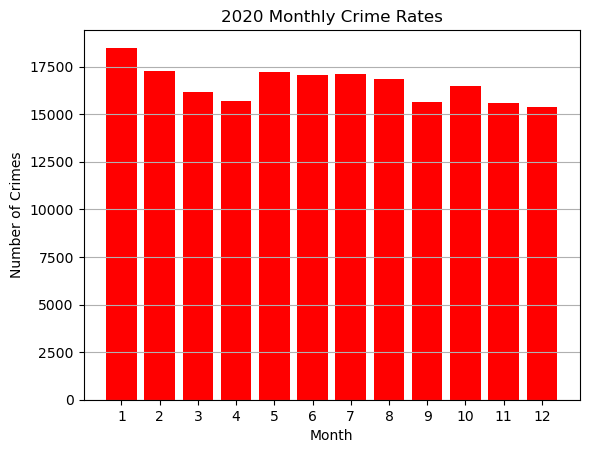

In [31]:
x = crime2020.groupby('Month Crime Occured',as_index=False).count()
y = x[['Month Crime Occured', 'DR_NO']].sort_values(by='Month Crime Occured')

plt.bar(x['Month Crime Occured'], y['DR_NO'], color='red')
plt.title("2020 Monthly Crime Rates")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.grid(axis='y')
plt.show()

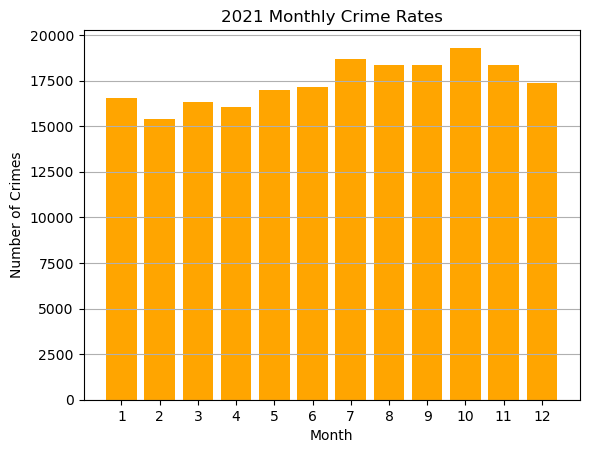

In [32]:
x = crime2021.groupby('Month Crime Occured',as_index=False).count()
y = x[['Month Crime Occured', 'DR_NO']].sort_values(by='Month Crime Occured')

plt.bar(x['Month Crime Occured'], y['DR_NO'], color='orange')
plt.title("2021 Monthly Crime Rates")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.grid(axis='y')
plt.show()

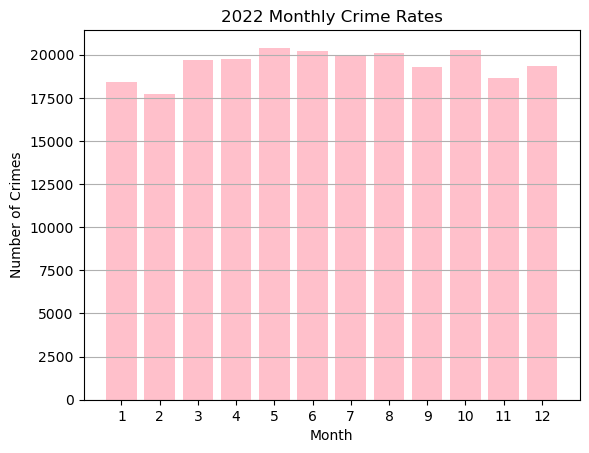

In [33]:
x = crime2022.groupby('Month Crime Occured',as_index=False).count()
y = x[['Month Crime Occured', 'DR_NO']].sort_values(by='Month Crime Occured')

plt.bar(x['Month Crime Occured'], y['DR_NO'], color='pink')
plt.title("2022 Monthly Crime Rates")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.grid(axis='y')
plt.show()

In [34]:
area = crime2022.groupby('AREA NAME', as_index=False)
area = area[['AREA NAME']].value_counts()
area = area.sort_values('count', ascending=False)
area.head()

,AREA NAME,count
1,Central,17632
0,77th Street,14483
15,Southwest,13341
12,Pacific,12980
6,Hollywood,12481


In [39]:
crime2022 = crime2022.loc[crime2022["LAT"]!=0,:]

id_theft_2022 = crime2022.loc[crime2022["Crm Cd"] == 354,:]

In [41]:
id_theft_2022['Crm Cd Desc'].value_counts()

Crm Cd Desc
THEFT OF IDENTITY    21748
Name: count, dtype: int64

In [66]:
monthly_count = []
month_tally = []
year = 2020

for dat_fr in [crime_data_2020, crime_data_2021, crime_data_2022]:
    for i in range(1,13):
        monthly_count.append([len(dat_fr.loc[(dat_fr["Crm Cd"] == 354) & (dat_fr["Month Crime Occured"] == i),:])])
        month_tally.append(f"{year}.{i}")
    year += 1


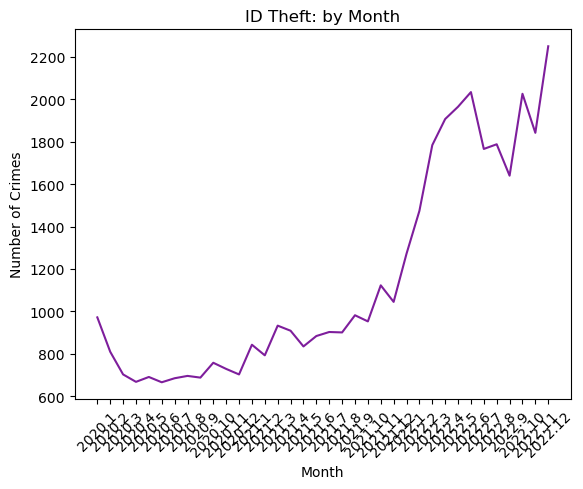

In [74]:
plt.plot(month_tally, monthly_count, color='xkcd:purple')
plt.title("ID Theft: by Month")
plt.xticks(rotation = 45)
plt.xlabel("Month")
plt.ylabel("Number of Crimes")




plt.show()

In [43]:
map_plot1 = crime2022.sample(10000).hvplot.points(
                                    "LON",
                                    "LAT",
                                    geo=True,
                                    tiles="CartoLight",
                                    frame_width=600,
                                    frame_height=500,
                                    color='AREA NAME'
                                    )
map_plot1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [LON,LAT]   (AREA NAME)

In [23]:
most_committed_crime_2022 = crime2022.groupby(['Crm Cd Desc'], as_index=False)
most_committed_crime_2022 = most_committed_crime_2022[['Crm Cd Desc']].value_counts()
most_committed_crime_2022 = most_committed_crime_2022.sort_values('count', ascending=False)
most_committed_crime_2022.head(10)

,Crm Cd Desc,count
128,VEHICLE - STOLEN,24646
113,THEFT OF IDENTITY,21748
4,BATTERY - SIMPLE ASSAULT,18012
20,BURGLARY FROM VEHICLE,14194
19,BURGLARY,14000
125,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",13302
2,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",12837
115,THEFT PLAIN - PETTY ($950 & UNDER),11324
71,INTIMATE PARTNER - SIMPLE ASSAULT,11122
110,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,10048


In [76]:
crm_types = crime_data_all['Crm Cd Desc'].unique()
crm_types

crm_cd_dict = {}

for type_of_crm in crm_types:
    crm_cd_dict[type_of_crm] = crime_data_all.loc[crime_data_all['Crm Cd Desc'] == type_of_crm,['Crm Cd']]['Crm Cd'].unique()[0]



In [83]:
crm_cd_series = pd.Series(crm_cd_dict).sort_values(ascending=True)

crm_cd_series.to_csv(path.join('Resources', 'Crime Code Lookup.csv'))

In [88]:
crime_data_all.loc[crime_data_all['Crm Cd'] == 948]

,Unnamed: 0,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Year Crime Occured
22116,221624,212018617,2021-12-23,2021-10-16,1330,20,Olympic,2034,2,948,...,Adult Arrest,948.0,NaN,NaN,NaN,3400 W 7TH ST,NaN,34.0597,-118.3009,2021
84447,284108,211500970,2021-09-16,2021-09-16,1225,15,N Hollywood,1503,2,948,...,Invest Cont,948.0,998.0,NaN,NaN,LAUREL CANYON,KITTRIDGE,34.1903,-118.3965,2021
16623,425499,221400715,2022-04-22,2022-04-22,1615,14,Pacific,1494,2,948,...,Invest Cont,948.0,998.0,NaN,NaN,100 WORLD WY,NaN,33.9455,-118.4004,2022
68198,477232,231310707,2023-05-14,2022-04-12,1300,13,Newton,1354,2,948,...,Invest Cont,948.0,NaN,NaN,NaN,4100 WOODLAWN AV,NaN,34.0090,-118.2728,2022
93095,502186,220204092,2022-01-03,2022-01-03,400,2,Rampart,256,2,948,...,Invest Cont,948.0,NaN,NaN,NaN,600 S BONNIE BRAE ST,NaN,34.0585,-118.2725,2022


In [99]:
crimes_with_mocodes = crime_data_all[crime_data_all["Mocodes"].notna()]
crimes_unknown_mo = crimes_with_mocodes.loc[(crimes_with_mocodes["Mocodes"].str.contains("9999")) & (crimes_with_mocodes["LAT"]!=0),['DATE OCC', 'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Status Desc', 'LAT', 'LON', 'AREA NAME']]

In [100]:
map_plot_3 = crimes_unknown_mo.hvplot.points(
                                    "LON",
                                    "LAT",
                                    geo=True,
                                    tiles="CartoLight",
                                    frame_width=600,
                                    frame_height=500,
                                    color='AREA NAME'
                                    )
map_plot_3

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [LON,LAT]   (AREA NAME)